In [1]:
token = ''

In [2]:
import qiskit

In [4]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.0',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.18.0'}

In [5]:
from qiskit import IBMQ

In [7]:
IBMQ.save_account(token, overwrite=True)

In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
# hello world
from qiskit import *

In [10]:
qr = QuantumRegister(2)

In [13]:
cr = ClassicalRegister(2)

In [14]:
circuit = QuantumCircuit(qr, cr)

In [15]:
%matplotlib inline

In [17]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c1_0: 
      
c1_1:

In [18]:
circuit.h(qr[0])

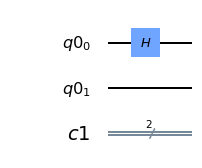

In [19]:
circuit.draw(output='mpl')

In [20]:
circuit.cx(qr[0], qr[1])

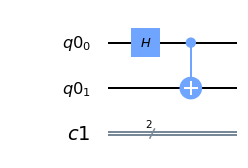

In [21]:
circuit.draw(output='mpl')

In [23]:
circuit.measure(qr, cr)

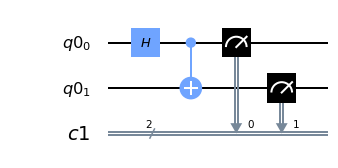

In [24]:
circuit.draw(output='mpl')

In [28]:
simulator = Aer.get_backend('qasm_simulator')

In [33]:
result = execute(circuit, simulator).result()

In [34]:
from qiskit.tools.visualization import plot_histogram

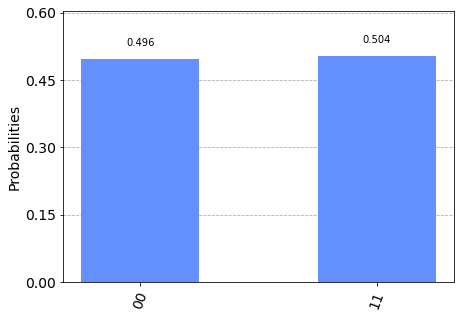

In [35]:
plot_histogram(result.get_counts(circuit))

In [36]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-04-17 12:53:03,527: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [38]:
provider = IBMQ.get_provider('ibm-q')

In [39]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [43]:
job = execute(circuit, backend=qcomp)

In [44]:
from qiskit.tools.monitor import job_monitor

In [45]:
job_monitor(job)

Job Status: job has successfully run


In [48]:
result = job.result()
print(result)

Result(backend_name='ibmq_16_melbourne', backend_version='2.0.6', date=datetime.datetime(2020, 4, 17, 12, 0, 48, tzinfo=datetime.timezone.utc), execution_id='111dec48-80a3-11ea-83af-002590bdc3da', header=Obj(backend_name='ibmq_16_melbourne', backend_version='2.0.6'), job_id='5e9999176ad41d00184b24be', qobj_id='cdfd2066-0625-4476-9462-43abef4068e7', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=518, 0x1=55, 0x2=44, 0x3=407)), header=Obj(clbit_labels=[['c1', 0], ['c1', 1]], creg_sizes=[['c1', 2]], memory_slots=2, n_qubits=15, name='circuit0', qreg_sizes=[['q', 15]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14]]), meas_level=2, memory=False, shots=1024, success=True)], status='Successful completion', success=True, time_taken=6.442255020141602)


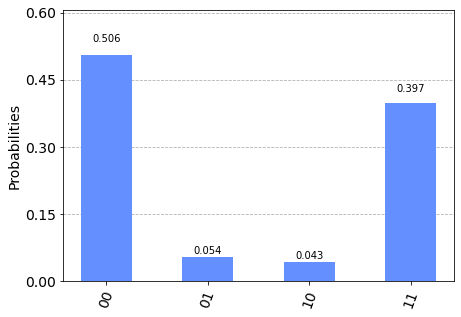

In [49]:
plot_histogram(result.get_counts(circuit))